# Master Thesis Notebook

## Setup

In [136]:
import pandas as pd
import glob 
import numpy as np
import matplotlib.pyplot as plt
import os
import skgstat as skg
from skgstat import models
import gstatsim as gs
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import QuantileTransformer 
import pyproj # for reprojection

field_a_paths = glob.glob("D:/Cours bioingé/BIR M2/Mémoire/Data/Drone GPR/Field A/*.txt") # return all file paths that match a specific pattern
field_b_paths = glob.glob("D:/Cours bioingé/BIR M2/Mémoire/Data/Drone GPR/Field B/*.txt")

# Define the transformer for WGS84 to UTM (UTM zone 32N)
transformer = pyproj.Transformer.from_crs("epsg:4326", "epsg:32632", always_xy=True)


In [137]:
gpr_data_tables = []
def import_data(file_paths=glob.glob("D:/Cours bioingé/BIR M2/Mémoire/Data/Drone GPR/Field A/*.txt")):
    for file_path in file_paths:
        gpr_data_table = pd.read_csv(file_path, sep = "  ", engine="python")
        gpr_data_tables.append(gpr_data_table)

    return gpr_data_tables

dates = []
def extract_dates(file_paths=glob.glob("D:/Cours bioingé/BIR M2/Mémoire/Data/Drone GPR/Field A/*.txt")):
    for file_path in file_paths:
        file_name = os.path.basename(file_path)
        file_name_without_extension = os.path.splitext(file_name)[0]
        date = file_name_without_extension[4:6] + "/" + file_name_without_extension[2:4] + "/" + "20" + file_name_without_extension[:2]
        dates.append(date)
    return dates

    

## GPR data analysis

### Field A GPR sampling overview

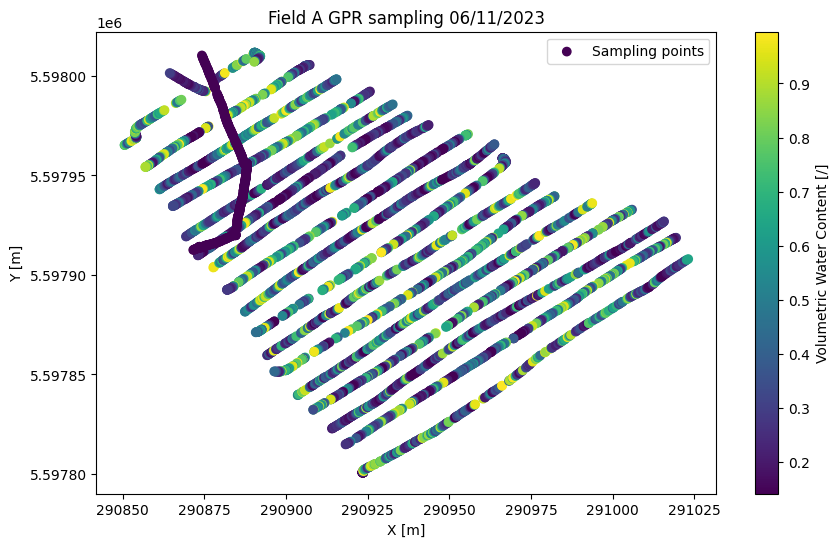

In [138]:
# File choice
sample_number = 8 # [0-10]
field_path = field_a_paths

# Letter of the field
if field_path == field_a_paths:
    field_letter = "A"
else:
    field_letter = "B"

# Date of the files
extract_dates(field_path)

# Read csv file
field_example = pd.read_csv(field_path[sample_number], sep = "  ", engine="python")

# Convert latitude and longitude to UTM coordinates
utm_x, utm_y = transformer.transform(field_example.iloc[:,1].values, field_example.iloc[:,0].values)

# Plot the sampling points
plt.figure(figsize=(10, 6))
scatter = plt.scatter(utm_x, utm_y, c=field_example.iloc[:,2], cmap='viridis', label='Sampling points')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title(f'Field {field_letter} GPR sampling {dates[sample_number]}')
cb = plt.colorbar(scatter)
cb.set_label('Volumetric Water Content [/]')
plt.grid(False)
plt.legend()
plt.show()


### Field B GPR sampling overview

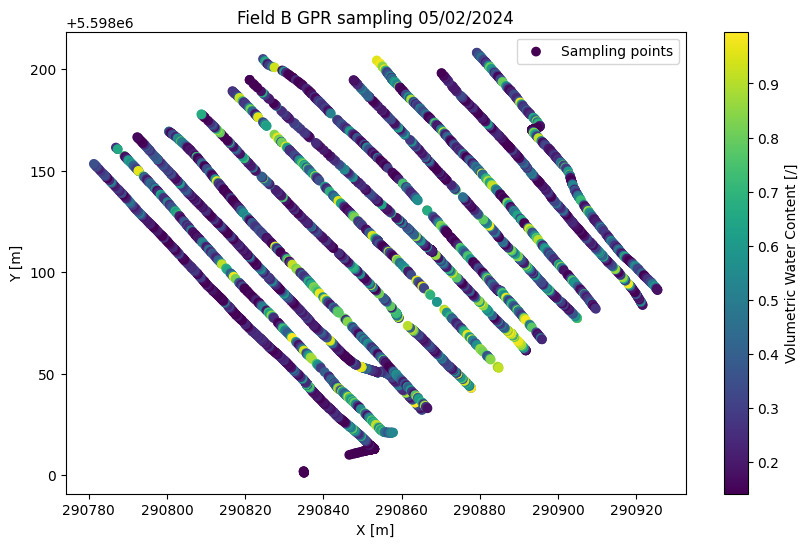

In [139]:
# File choice
sample_number = 9 # [0-10]
field_path = field_b_paths

# Letter of the field
if field_path == field_a_paths:
    field_letter = "A"
else:
    field_letter = "B"

# Date of the files
extract_dates(field_path)

# Read csv file
field_example = pd.read_csv(field_path[sample_number], sep = "  ", engine="python")

# Convert latitude and longitude to UTM coordinates
utm_x, utm_y = transformer.transform(field_example.iloc[:,1].values, field_example.iloc[:,0].values)

# Plot the sampling points
plt.figure(figsize=(10, 6))
scatter = plt.scatter(utm_x, utm_y, c=field_example.iloc[:,2], cmap='viridis', label='Sampling points')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title(f'Field {field_letter} GPR sampling {dates[sample_number]}')
cb = plt.colorbar(scatter)
cb.set_label('Volumetric Water Content [/]')
plt.grid(False)
plt.legend()
plt.show()

# Reset
gpr_data_tables = []
dates = []

### Volumetric water content evolution of field A

#### Mean and median plots

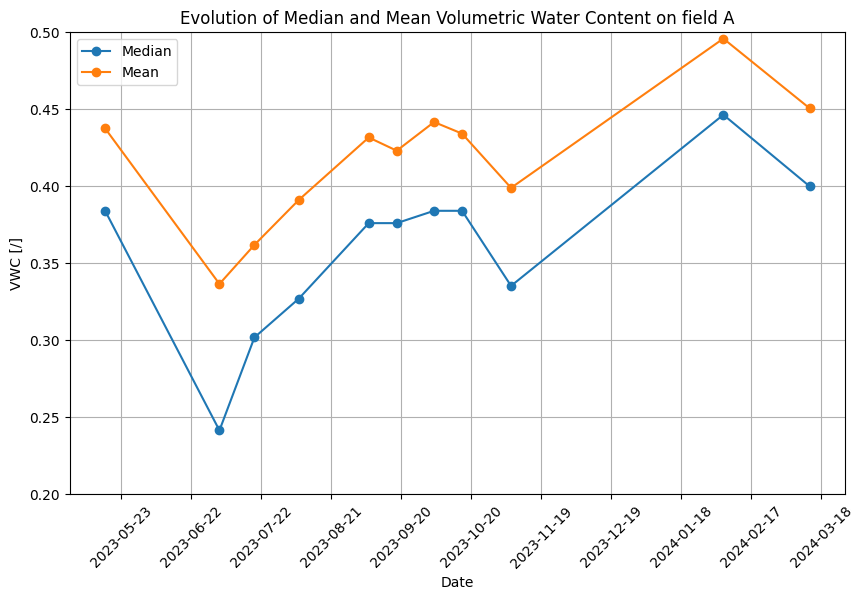

In [140]:
import_data(field_a_paths)

mean_GPR_data_tables = []
for gpr_data_table in gpr_data_tables:
    mean_GPR_data_table = gpr_data_table.iloc[:,2].mean()
    mean_GPR_data_tables.append(mean_GPR_data_table)

median_GPR_data_tables = []
for gpr_data_table in gpr_data_tables:
    median_GPR_data_table = gpr_data_table.iloc[:,2].median()
    median_GPR_data_tables.append(median_GPR_data_table)

dates = extract_dates(field_a_paths)

# Convert dates to datetime objects
dates = pd.to_datetime(dates, format="%d/%m/%Y")

plt.figure(figsize=(10, 6))
plt.plot(dates, median_GPR_data_tables, marker='o', label='Median')
plt.plot(dates, mean_GPR_data_tables, marker='o', label='Mean')
plt.xlabel('Date')
plt.ylabel('VWC [/]')
plt.title('Evolution of Median and Mean Volumetric Water Content on field A')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.ylim(0.2, 0.5)
plt.grid(True)
plt.legend()
plt.show()


# Reset
gpr_data_tables = []
dates = []

### Volumetric water content evolution of field B

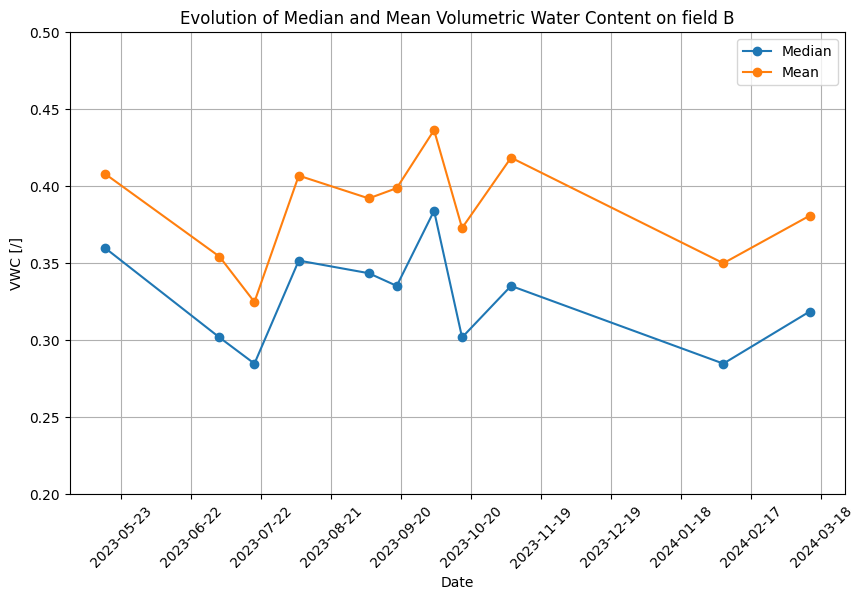

In [141]:
import_data(field_b_paths)

mean_GPR_data_tables = []
for gpr_data_table in gpr_data_tables:
    mean_GPR_data_table = gpr_data_table.iloc[:,2].mean()
    mean_GPR_data_tables.append(mean_GPR_data_table)

median_GPR_data_tables = []
for gpr_data_table in gpr_data_tables:
    median_GPR_data_table = gpr_data_table.iloc[:,2].median()
    median_GPR_data_tables.append(median_GPR_data_table)

dates = extract_dates(field_b_paths)

# Convert dates to datetime objects
dates = pd.to_datetime(dates, format="%d/%m/%Y")

plt.figure(figsize=(10, 6))
plt.plot(dates, median_GPR_data_tables, marker='o', label='Median')
plt.plot(dates, mean_GPR_data_tables, marker='o', label='Mean')
plt.xlabel('Date')
plt.ylabel('VWC [/]')
plt.title('Evolution of Median and Mean Volumetric Water Content on field B')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.ylim(0.2, 0.5)
plt.grid(True)
plt.legend()
plt.show()

# Reset
gpr_data_tables = []
dates = []

#### Kriging
Kriging is a type of interpolation that uses a semivariogram, which measures spatial autocorrelation (how similar close points are in value and how this similarity changes as distance between points increases). Thus, the semivariogram determines how much influence a known point has on an unknown point as the distance between the known point and the unknown point increases. In other words, the weight of a known point on an unknown point decreases with increasing distance, and the semivariogram determines how quickly that weight tapers with increasing distance

In [142]:
# grid data to 1000 m resolution and remove coordinates with NaNs
res = 1000
df_grid, grid_matrix, rows, cols = gs.Gridding.grid_data(field_example, 'X', 'Y', 'Bed', res)
df_grid = df_grid[df_grid["Z"].isnull() == False]
df_grid = df_grid.rename(columns = {"Z": "Bed"})

# normal score transformation
data = df_grid['Bed'].values.reshape(-1,1)
nst_trans = QuantileTransformer(n_quantiles=500, output_distribution="normal").fit(data)
df_grid['Nbed'] = nst_trans.transform(data) 

# compute experimental (isotropic) variogram
coords = df_grid[['X','Y']].values
values = df_grid['Nbed']

maxlag = 50000          # maximum range distance
n_lags = 70             # num of bins

# compute variogram
V1 = skg.Variogram(coords, values, bin_func='even', n_lags=n_lags, 
                   maxlag=maxlag, normalize=False)

# extract variogram values
xdata = V1.bins
ydata = V1.experimental

plt.figure(figsize=(6,4))
plt.scatter(xdata, ydata, s=12, c='g')
plt.title('Isotropoic Experimental Variogram')
plt.xlabel('Lag (m)'); plt.ylabel('Semivariance')  
plt.show()

KeyError: 'X'

## Multispectral analysis

### Volumetric water content evolution of field A

## Multispectral vs GPR

# Tests